In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_weather(*args):
    data_set = {}
    for city_name in args:
        url = 'http://api.openweathermap.org/data/2.5/weather?q={}&APPID=78a769026b2c8d1b99f763c0aa6bf3ab'.format(city_name,)
        json_data = requests.get(url).json()
        data = (json_data['coord']['lon'], json_data['coord']['lat'], json_data['main']['temp'], json_data['main']['humidity'])
        data_set[city_name] = data
    return data_set

In [3]:
def put_data_on_plot(data):

    df = pd.DataFrame(data,index = ['lon','lat','temp','humidity'])

    plt.scatter(x = df.loc['lon'],y = df.loc['lat'])
    plt.xlabel("Longtitude")
    plt.ylabel("Latitude")
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    img = plt.imread('earth.gif')
    plt.imshow(img, extent=[-180,180,-90,90])
    plt.show()

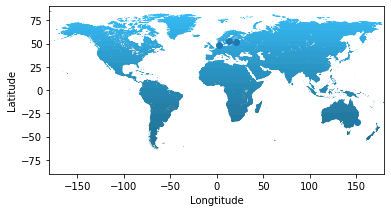

In [4]:
result = get_weather('Warsaw','Berlin','Paris','Sydney')
put_data_on_plot(result)